# Capstone Project EDA: Heart Attack Risk Prevention Dataset


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Import Required Packages for EDA
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read the dataset
df = pd.read_csv('/content/drive/MyDrive/CapstoneProject/heart_attack_prediction_dataset.csv')

In [ ]:
# Checking description(first 5 rows)
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
# Checking description(last 5 rows)
df.tail()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0
8762,ZWN9666,25,Female,356,138/67,75,1,1,0,0,...,9.005234,247338,32.914151,180,7,4,United Kingdom,Europe,Northern Hemisphere,1


In [ ]:
# Rows and columns - data shape (attributes & samples)
df.shape

(8763, 26)

In [ ]:
# Name of the attributes
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [ ]:
# Unique values for each attribute
df.nunique()

Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere                            2


In [ ]:
# Complete info about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

**Observation:**
You can see that there are no missing rows in the entire dataset. So, we do not need to fill/drop any value.

In [ ]:
# Checking for missing values in the data
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

**Observation:** There are no missing values.

In [ ]:
# Counting duplicates
df.duplicated().sum()

0

**Observation:** There are no duplicate rows

In [ ]:
# Generate summarized statistics of the dataset distribution
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8763.0,53.707977,21.249509,18.000000,35.000000,54.000000,72.000000,90.000000
Cholesterol,8763.0,259.877211,80.863276,120.000000,192.000000,259.000000,330.000000,400.000000
Heart Rate,8763.0,75.021682,20.550948,40.000000,57.000000,75.000000,93.000000,110.000000
Diabetes,8763.0,0.652288,0.476271,0.000000,0.000000,1.000000,1.000000,1.000000
Family History,8763.0,0.492982,0.499979,0.000000,0.000000,0.000000,1.000000,1.000000
Smoking,8763.0,0.896839,0.304186,0.000000,1.000000,1.000000,1.000000,1.000000
Obesity,8763.0,0.501426,0.500026,0.000000,0.000000,1.000000,1.000000,1.000000
Alcohol Consumption,8763.0,0.598083,0.490313,0.000000,0.000000,1.000000,1.000000,1.000000
Exercise Hours Per Week,8763.0,10.014284,5.783745,0.002442,4.981579,10.069559,15.050018,19.998709
Previous Heart Problems,8763.0,0.495835,0.500011,0.000000,0.000000,0.000000,1.000000,1.000000


**Observation:**

*   Age of the group varies from 18 to 90 and the mean age is 54.
*   The average Cholesterol level of an individual is 259 whereas the maximum value goes upto 400.
*   The average Heart Rate of the group is 75, whereas overall it ranges between 57 to 110.


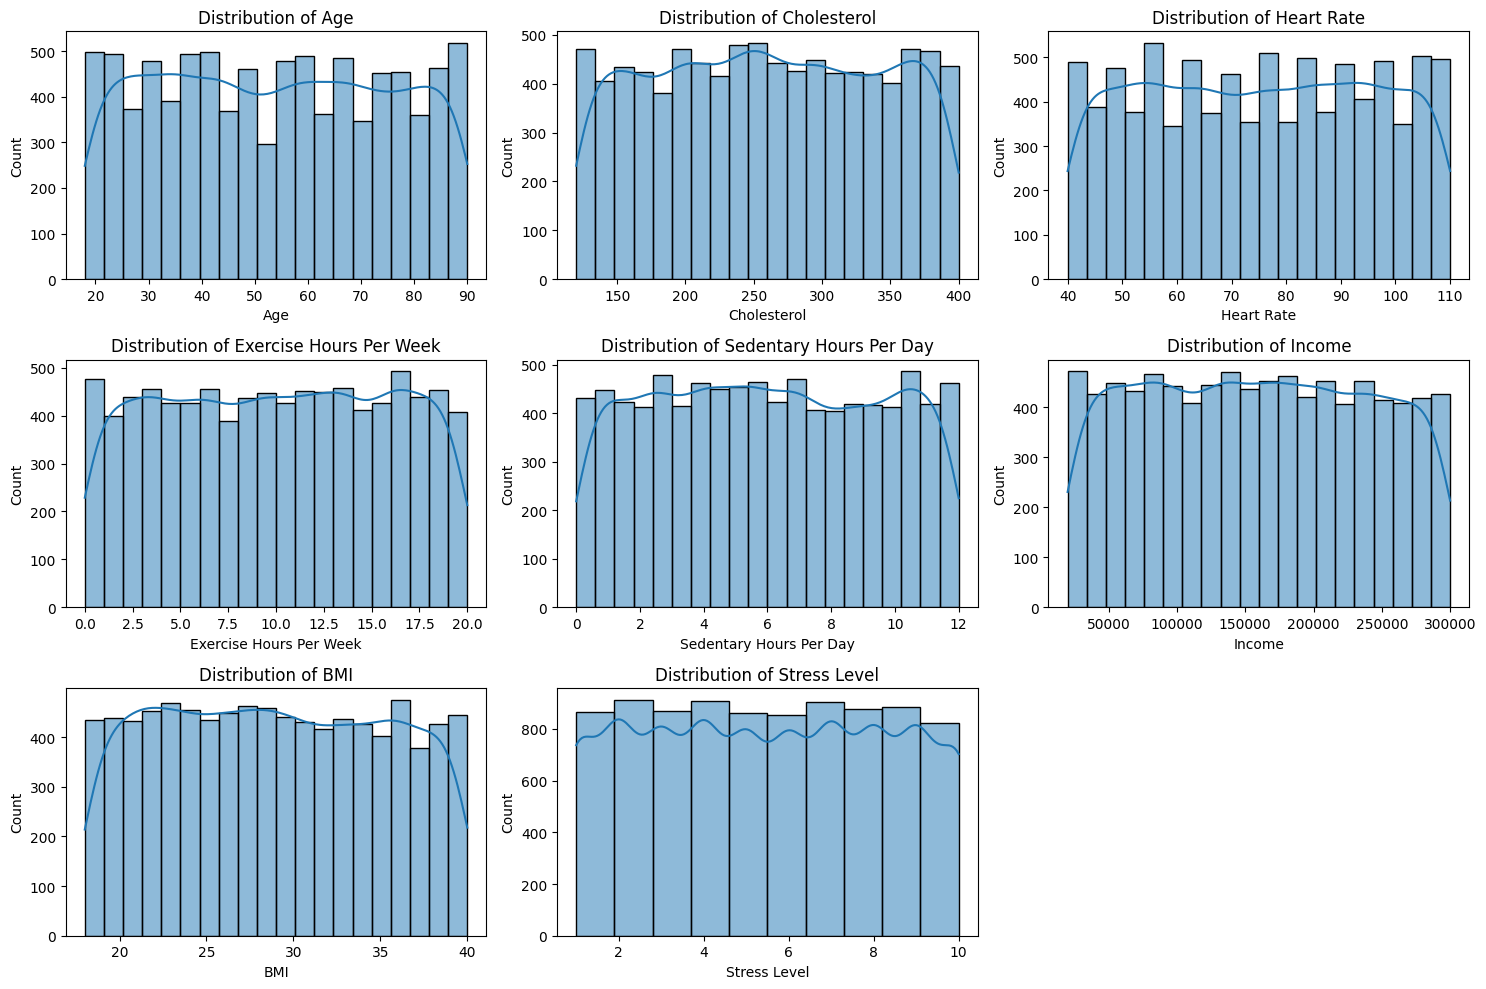

In [ ]:
# Visualising data distribution in detail

# Set a larger figure size for better visibility of plots
plt.figure(figsize=(15, 10))

# Distribution of Age
plt.subplot(3, 3, 1)
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')

# Distribution of Cholesterol
plt.subplot(3, 3, 2)
sns.histplot(data=df, x='Cholesterol', bins=20, kde=True)
plt.title('Distribution of Cholesterol')

# Distribution of Heart Rate
plt.subplot(3, 3, 3)
sns.histplot(data=df, x='Heart Rate', bins=20, kde=True)
plt.title('Distribution of Heart Rate')

# Distribution of Exercise Hours Per Week
plt.subplot(3, 3, 4)
sns.histplot(data=df, x='Exercise Hours Per Week', bins=20, kde=True)
plt.title('Distribution of Exercise Hours Per Week')

# Distribution of Sedentary Hours Per Day
plt.subplot(3, 3, 5)
sns.histplot(data=df, x='Sedentary Hours Per Day', bins=20, kde=True)
plt.title('Distribution of Sedentary Hours Per Day')

# Distribution of Income
plt.subplot(3, 3, 6)
sns.histplot(data=df, x='Income', bins=20, kde=True)
plt.title('Distribution of Income')

# Distribution of BMI
plt.subplot(3, 3, 7)
sns.histplot(data=df, x='BMI', bins=20, kde=True)
plt.title('Distribution of BMI')

# Distribution of Stress Level
plt.subplot(3, 3, 8)
sns.histplot(data=df, x='Stress Level', bins=10, kde=True)
plt.title('Distribution of Stress Level')

plt.tight_layout()
plt.show()

0    5624
1    3139
Name: Heart Attack Risk, dtype: int64


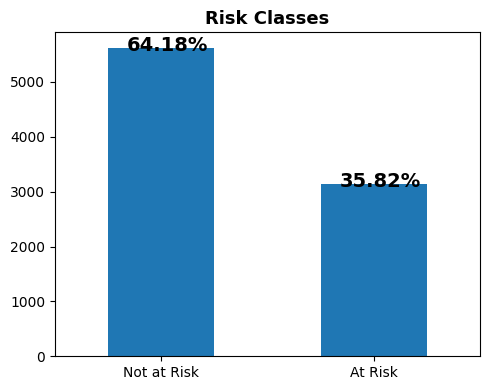

In [ ]:
# Checking Target Value Distribution
print(df['Heart Attack Risk'].value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["Not at Risk", "At Risk"]
ax = df["Heart Attack Risk"].value_counts().plot(kind='bar')
ax.set_title("Risk Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To Calculate the Percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='black', weight='bold')

plt.tight_layout()

**Observation:** In this dataset 64.18% of patients are not at risk of heart attack, while 35.82% are at risk.

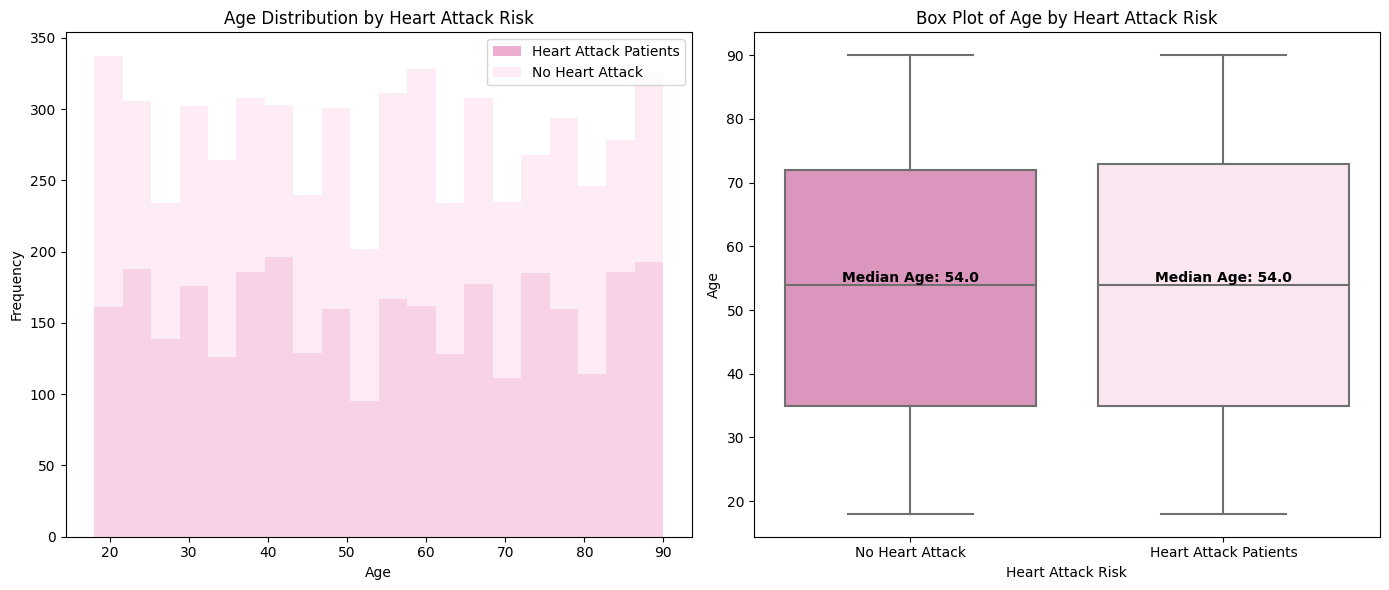

In [ ]:
# Create separate DataFrames for patients with and without heart attack risk
risk_patients = df[df['Heart Attack Risk'] == 1]
no_risk_patients = df[df['Heart Attack Risk'] == 0]

# Define the color palette
colors = ['#e68bbe', '#fde4f2']

# Create subplots for better organization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Create a histogram to visualize age distribution
axes[0].hist(risk_patients['Age'], bins=20, alpha=0.7, label='Heart Attack Patients', color=colors[0])
axes[0].hist(no_risk_patients['Age'], bins=20, alpha=0.7, label='No Heart Attack', color=colors[1])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Age Distribution by Heart Attack Risk')
axes[0].legend()

# Create a box plot to compare median ages
sns.boxplot(x='Heart Attack Risk', y='Age', data=df, ax=axes[1], palette=colors)
axes[1].set_xlabel('Heart Attack Risk')
axes[1].set_ylabel('Age')
axes[1].set_title('Box Plot of Age by Heart Attack Risk')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Heart Attack', 'Heart Attack Patients'])

# Add annotations for median ages
medians = df.groupby('Heart Attack Risk')['Age'].median()
medians_labels = [f'Median Age: {medians[0]}', f'Median Age: {medians[1]}']
for i, median in enumerate(medians):
    axes[1].text(i, median, medians_labels[i], horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='black', fontweight='bold')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

**Observation:**
The age of a person does not affect the risk of a heart attack.

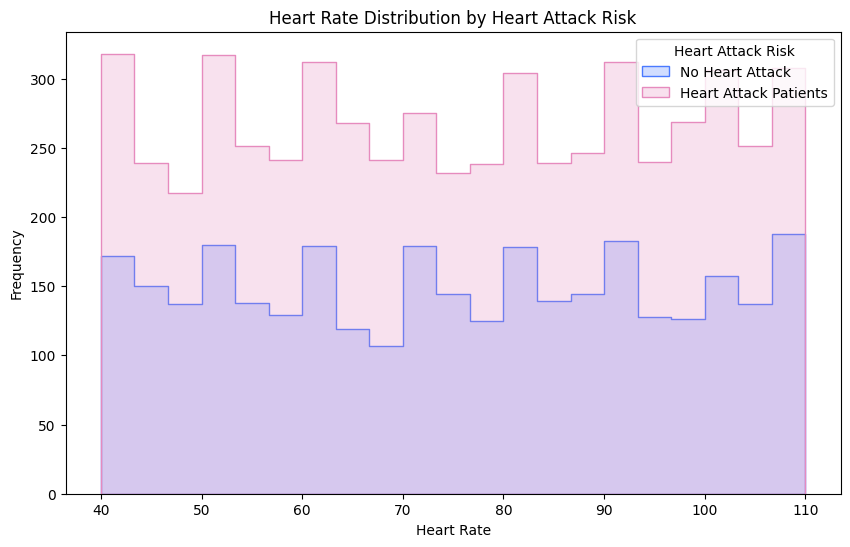

In [ ]:
# Create histogram to visualize heart rate distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Heart Rate', hue='Heart Attack Risk', element='step', common_norm=False, palette=['#e68bbe', '#4a7aff'])
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.title('Heart Rate Distribution by Heart Attack Risk')
plt.legend(title='Heart Attack Risk', labels=['No Heart Attack', 'Heart Attack Patients'])
plt.show()

**Observation:** From the histogram above it can be deduced that having a higher heart rate does not increase the risk heart attack. As an increase/decrease in heart rate in the x-axis had similar frequency output in the y-axis.

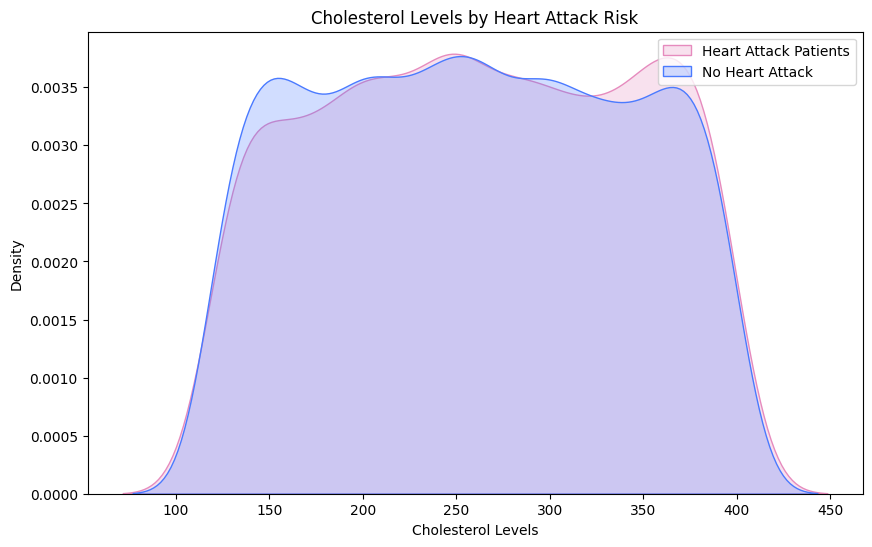

In [ ]:
# Create separate DataFrames for patients with and without heart attack risk
risk_patients = df[df['Heart Attack Risk'] == 1]
no_risk_patients = df[df['Heart Attack Risk'] == 0]

# Create density plots to compare cholesterol levels
plt.figure(figsize=(10, 6))
sns.kdeplot(risk_patients['Cholesterol'], label='Heart Attack Patients', color='#e68bbe', fill=True)
sns.kdeplot(no_risk_patients['Cholesterol'], label='No Heart Attack', color='#4a7aff', fill=True)
plt.xlabel('Cholesterol Levels')
plt.ylabel('Density')
plt.title('Cholesterol Levels by Heart Attack Risk')
plt.legend()
plt.show()

**Observation:** Considering how the density plot of the 'No Heart Attack' is so similar to 'Heart Attack Patients', the Cholesterol levels of person does not contribute as a risk factor towards heart attack.


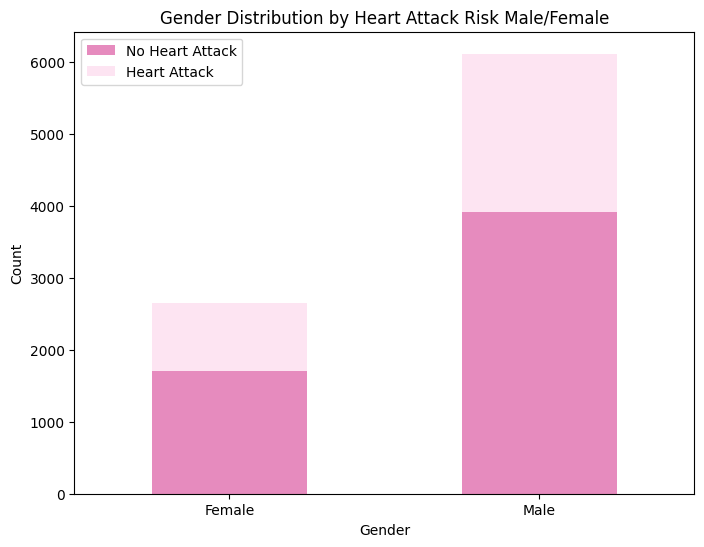

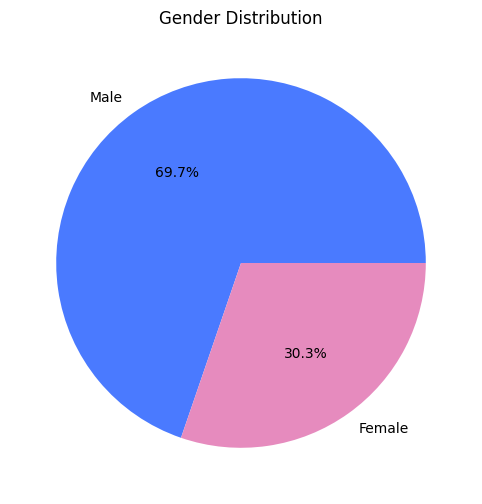

In [ ]:
gender_risk = df.groupby(['Sex', 'Heart Attack Risk']).size().unstack().fillna(0)

# Create a bar chart
plt.figure(figsize=(8, 6))
gender_risk.plot(kind='bar', stacked=True, color=['#e68bbe', '#fde4f2'], ax=plt.gca())
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution by Heart Attack Risk Male/Female')
plt.xticks(rotation=0)
plt.legend(['No Heart Attack', 'Heart Attack'])
plt.show()

# Create a pie chart
plt.figure(figsize=(8, 6))

gender_counts = df['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#4a7aff', '#e68bbe'])
plt.title('Gender Distribution')
plt.show()

**Observation:** Men are more likely to be at risk of heart attack than woman.

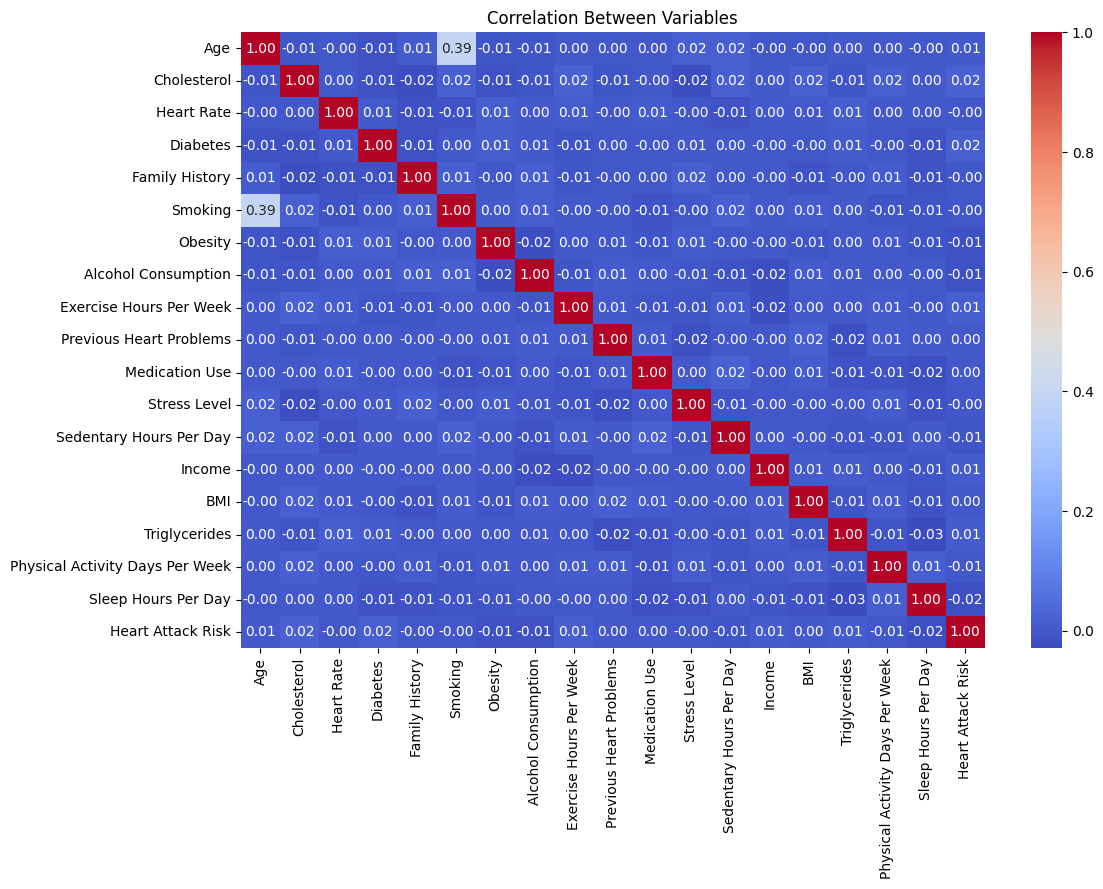

In [ ]:
# Exclude non-numeric columns before creating the correlation matrix
num_col = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_col.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Variables')
plt.show()

In [ ]:
!pip install typing-extensions --upgrade

In [ ]:
# Installing Pandas Profiling module
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 17.8 MB 20.3 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 72.1 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357559 sha256=cccce5d3af872c81d07ff3a89bdc94fe037e65675c984b615574ab06637eba65
  Stored in directory: /tmp/pip-ephem-wheel-cache-9hjbflpe/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d7e1103560198df5cdb74c3767f839e4368d6ef695ee5b745c41eaea963d0f98
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec59

In [ ]:
#obtain full profiler report
#restart kernel
#re-run import libraries and data
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
profile = ProfileReport(df,title="Heart Attack Risk EDA", html={'style':{'full_width':True}})
profile.to_notebook_iframe()

ImportError: ignored

I don't know why the Profile Report stopped working. I think there was a new update in one the libraries and something broke down.